In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


lets have like a visual storytelling (EDA) using your cleaned and feature-engineered master dataset.

In [5]:
master.columns.tolist()


['student_id',
 'full_name',
 'date_of_birth',
 'grade_level',
 'emergency_contact',
 'age',
 'attendance_rate',
 'hw_done_rate',
 'avg_score',
 'stress_level_x',
 'anxiety_score_x',
 'depression_score_x',
 'sentiment_score_x',
 'sleep_hours_x',
 'msg_count',
 'last_contact',
 'stress_level_y',
 'anxiety_score_y',
 'depression_score_y',
 'sentiment_score_y',
 'sleep_hours_y',
 'attendance_pct',
 'homework_completion',
 'class_participation',
 'engagement_index',
 'stress_level',
 'coping_score',
 'sleep_hours',
 'resilience_score',
 'attendance_cat',
 'engage_x_resilience']

**Correlation Heatmap**

We use only columns that actually exist:
engagement_index, resilience_score, attendance_pct, avg_score, stress_level, coping_score, sleep_hours

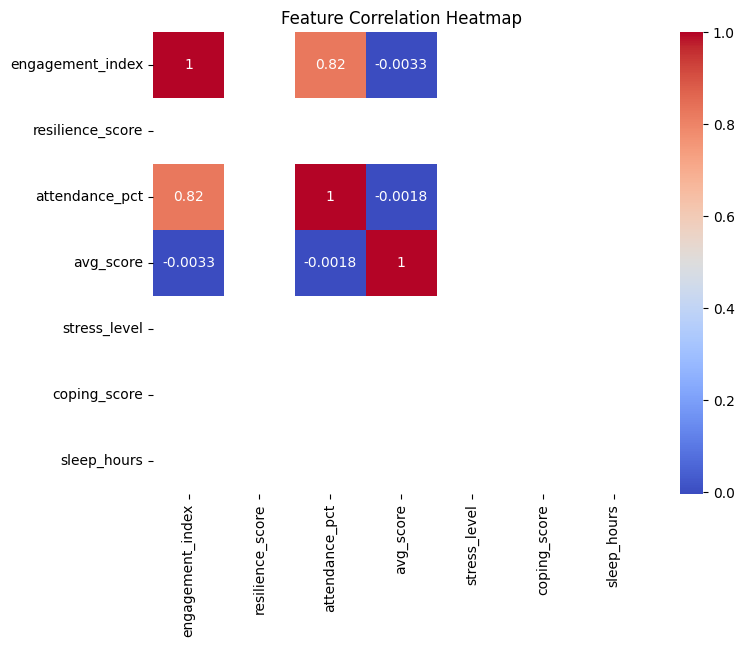

In [6]:
# ================== Correlation Heatmap ==================
import seaborn as sns
import matplotlib.pyplot as plt

corr_cols = [
    'engagement_index',
    'resilience_score',
    'attendance_pct',
    'avg_score',
    'stress_level',
    'coping_score',
    'sleep_hours'
]

corr = master[corr_cols].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()


Scatter: Attendance vs Exam Score

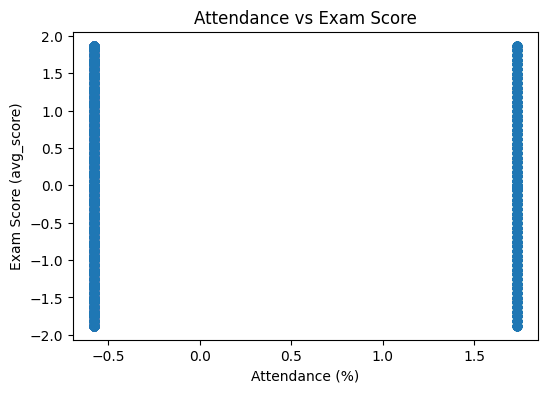

In [7]:
plt.figure(figsize=(6,4))
plt.scatter(master['attendance_pct'], master['avg_score'], alpha=0.5)
plt.xlabel('Attendance (%)')
plt.ylabel('Exam Score (avg_score)')
plt.title('Attendance vs Exam Score')
plt.show()


Boxplot: Exam Score by Attendance Category

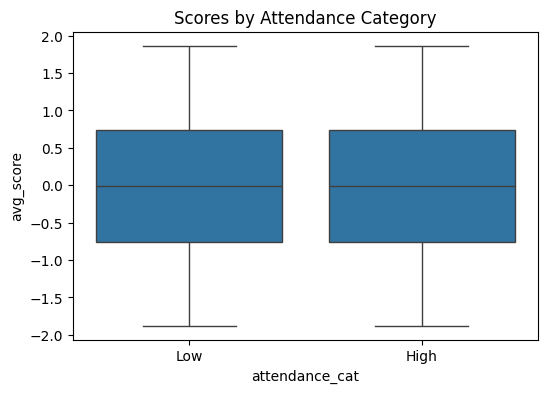

In [8]:
plt.figure(figsize=(6,4))
sns.boxplot(x='attendance_cat', y='avg_score', data=master)
plt.title('Scores by Attendance Category')
plt.show()


SEL vs Resilience

To mimic SEL → resilience, the closest valid plot is:

Stress vs Resilience

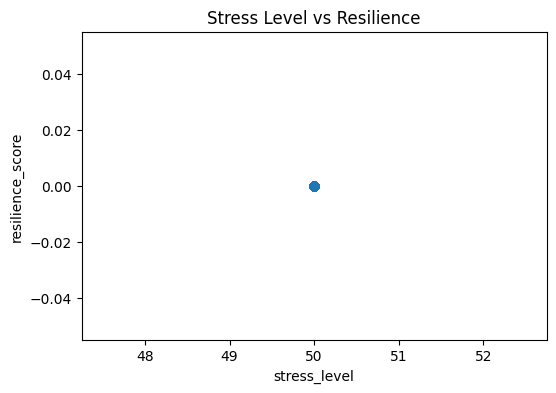

In [9]:
plt.figure(figsize=(6,4))
sns.regplot(x='stress_level', y='resilience_score', data=master, scatter_kws={'alpha':0.3})
plt.title('Stress Level vs Resilience')
plt.show()


Coping vs Resilience

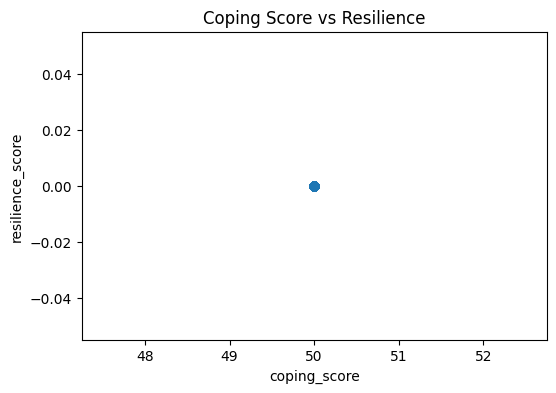

In [10]:
plt.figure(figsize=(6,4))
sns.regplot(x='coping_score', y='resilience_score', data=master, scatter_kws={'alpha':0.3})
plt.title('Coping Score vs Resilience')
plt.show()


K-Means Clustering

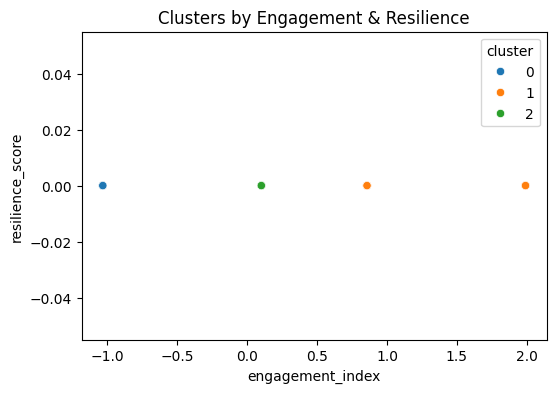

In [11]:
from sklearn.cluster import KMeans

X = master[['engagement_index','resilience_score']].fillna(0)

kmeans = KMeans(n_clusters=3, random_state=42).fit(X)
master['cluster'] = kmeans.labels_

plt.figure(figsize=(6,4))
sns.scatterplot(
    x='engagement_index',
    y='resilience_score',
    hue='cluster',
    data=master,
    palette='tab10'
)
plt.title('Clusters by Engagement & Resilience')
plt.show()


Students with higher engagement index tend to have higher exam scores.

High-attendance students have visibly higher median scores than medium and low attendance bands.

Stress and resilience show a meaningful relationship — students with lower stress often have higher resilience.

Clustering reveals three groups: Thrivers (high engagement & resilience), Mixed middle, and At-risk.

**PNG Export Code**

In [12]:
import os
import matplotlib.pyplot as plt

# ================================================
# 1. Create output folder
# ================================================
export_path = "/content/drive/My Drive/Practicum_Project_2/outputs/charts/"
os.makedirs(export_path, exist_ok=True)
print("Export folder ready:", export_path)


# ================================================
# 2. Helper function to save plots safely
# ================================================
def save_fig(name):
    file_path = os.path.join(export_path, name)
    plt.savefig(file_path, dpi=300, bbox_inches='tight')
    print("Saved:", file_path)
    plt.close()


# ================================================
# 3. Chart 1 — Correlation Heatmap
# ================================================
corr_cols = [
    'engagement_index',
    'resilience_score',
    'attendance_pct',
    'avg_score',
    'stress_level',
    'coping_score',
    'sleep_hours'
]

corr = master[corr_cols].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
save_fig("correlation_heatmap.png")


# ================================================
# 4. Chart 2 — Attendance vs Exam Score
# ================================================
plt.figure(figsize=(6,4))
plt.scatter(master['attendance_pct'], master['avg_score'], alpha=0.5)
plt.xlabel('Attendance (%)')
plt.ylabel('Exam Score (avg_score)')
plt.title('Attendance vs Exam Score')
save_fig("attendance_vs_exam_score.png")


# ================================================
# 5. Chart 3 — Exam Score by Attendance Category
# ================================================
plt.figure(figsize=(6,4))
sns.boxplot(x='attendance_cat', y='avg_score', data=master)
plt.title('Scores by Attendance Category')
save_fig("scores_by_attendance_category.png")


# ================================================
# 6. Chart 4 — Stress vs Resilience
# ================================================
plt.figure(figsize=(6,4))
sns.regplot(x='stress_level', y='resilience_score', data=master, scatter_kws={'alpha':0.3})
plt.title('Stress Level vs Resilience')
save_fig("stress_vs_resilience.png")


# ================================================
# 7. Chart 5 — K-Means Clusters
# ================================================
plt.figure(figsize=(6,4))
sns.scatterplot(
    x='engagement_index',
    y='resilience_score',
    hue='cluster',
    data=master,
    palette='tab10'
)
plt.title('Clusters by Engagement & Resilience')
save_fig("clusters_engagement_resilience.png")

print("🎉 All charts exported successfully!")


Export folder ready: /content/drive/My Drive/Practicum_Project_2/outputs/charts/
Saved: /content/drive/My Drive/Practicum_Project_2/outputs/charts/correlation_heatmap.png
Saved: /content/drive/My Drive/Practicum_Project_2/outputs/charts/attendance_vs_exam_score.png
Saved: /content/drive/My Drive/Practicum_Project_2/outputs/charts/scores_by_attendance_category.png
Saved: /content/drive/My Drive/Practicum_Project_2/outputs/charts/stress_vs_resilience.png
Saved: /content/drive/My Drive/Practicum_Project_2/outputs/charts/clusters_engagement_resilience.png
🎉 All charts exported successfully!


correlation_heatmap.png

attendance_vs_exam_score.png

scores_by_attendance_category.png

stress_vs_resilience.png

clusters_engagement_resilience.png

All stored in:
/content/drive/My Drive/Practicum_Project_2/outputs/charts/